In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data
data = pd.read_csv("/content/Zoo.csv")
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# EDA

In [3]:
data.shape

(101, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
data['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

# Checking missing value

In [7]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

# Checking duplicated value

In [8]:
data.duplicated().sum()

0

In [9]:
#check if there are duplicates in animal_name
duplicates = data['animal name'].value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal name, dtype: int64

In [10]:
frog = data[data['animal name'] == 'frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [11]:
# observation: find that one frog is venomous and another one is not
# change the venomous one into frog2 to seperate 2 kinds of frog
data['animal name'][(data['venomous'] == 1 )& (data['animal name'] == 'frog')] = "frog2"

In [12]:
data['venomous'].value_counts()

0    93
1     8
Name: venomous, dtype: int64

# Correlation Analysis

In [13]:
data.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


<Axes: >

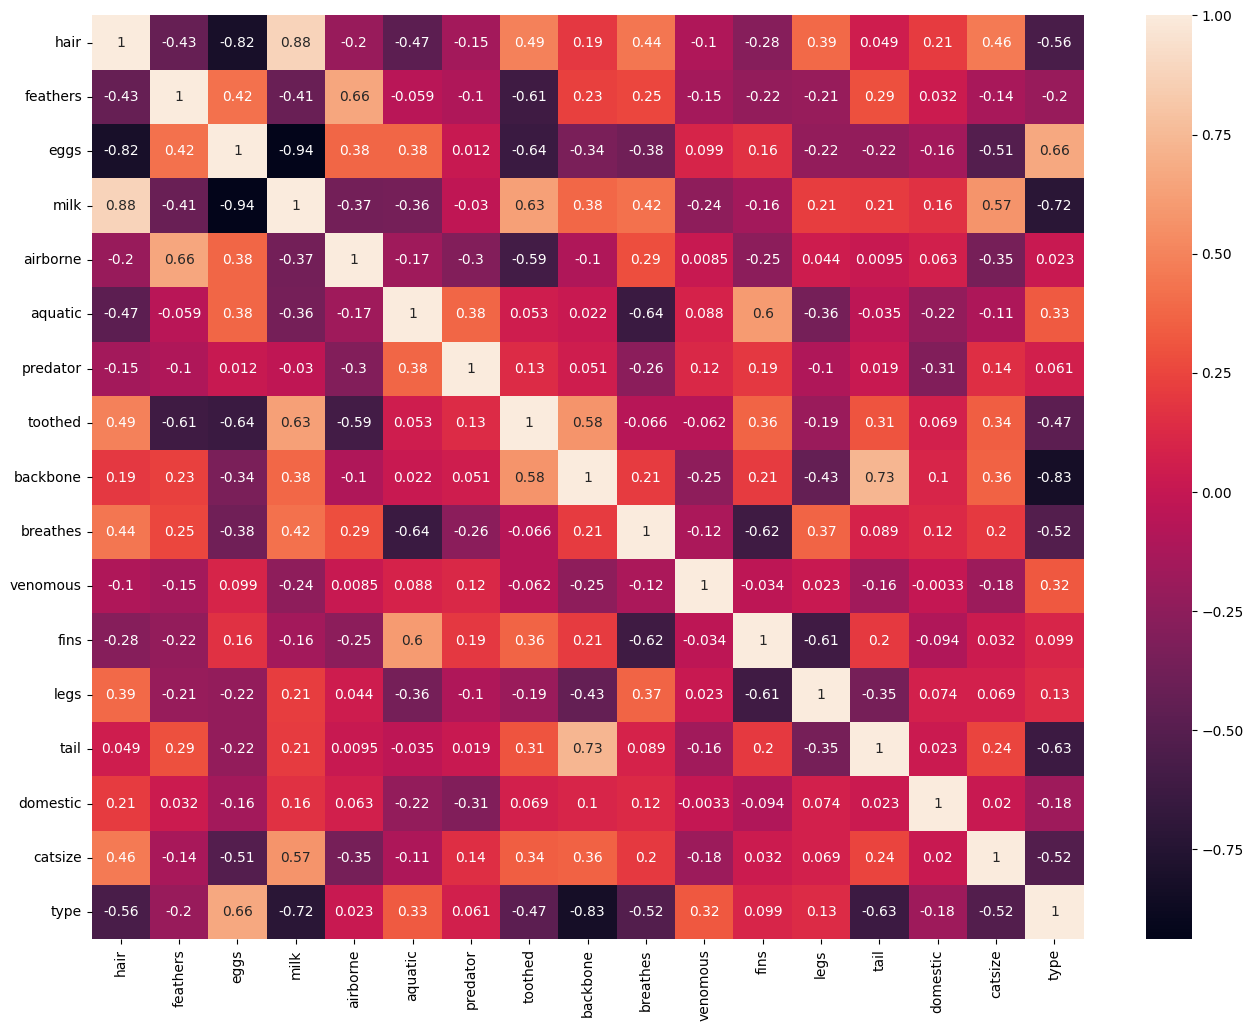

In [14]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),annot = True)

# Renaming column

In [16]:
data = data.rename({'animal name':'animal_name'},axis=1)

In [17]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [18]:
# finding Unique value of hair
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow" ) for i in data.hair]
unique_color = list(set(color_list))
unique_color

['red', 'blue']

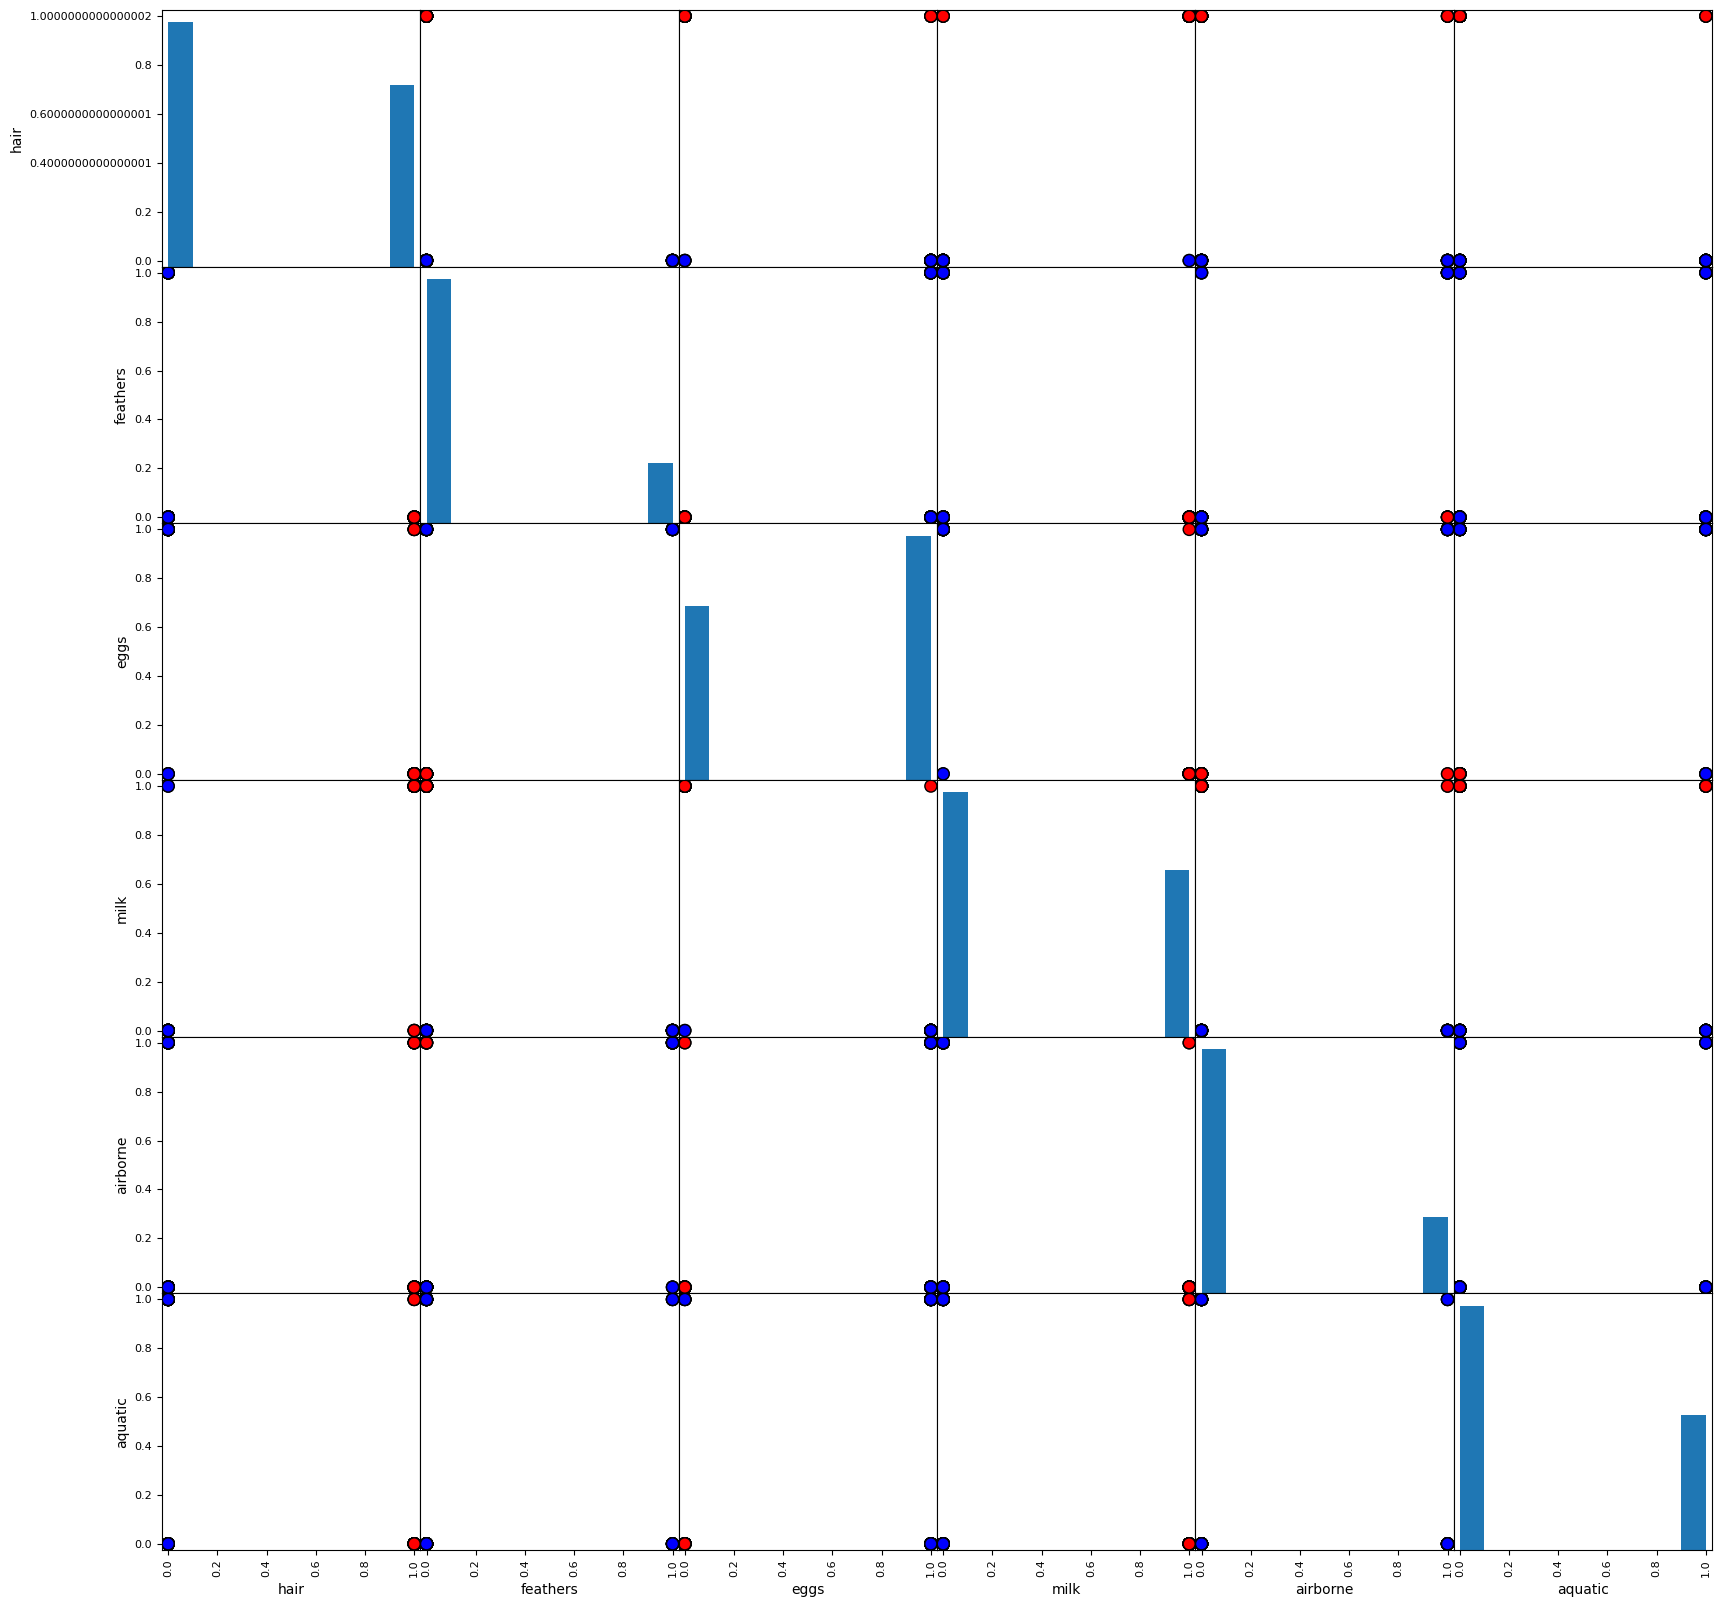

In [19]:
# scatter matrix to observe relationship between every colomn attribute.
pd.plotting.scatter_matrix(data.iloc[:,:7],
                                       c=color_list,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

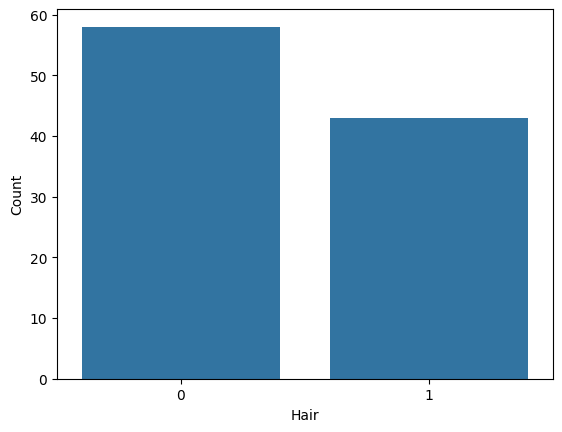

0    58
1    43
Name: hair, dtype: int64

In [20]:
sns.countplot(x="hair", data=data)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
data.loc[:,'hair'].value_counts()


[]

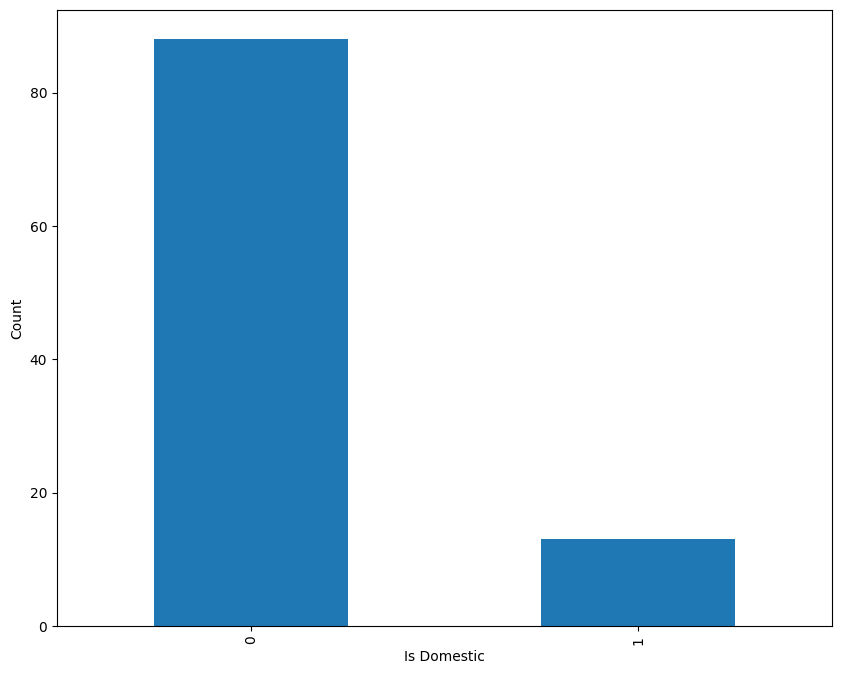

In [21]:
# Lets plot how many animals are domestic or not
plt.figure(figsize=(10,8));
data['domestic'].value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot()

### So we can see mostly animals are not domestic.

In [22]:
pd.crosstab(data['type'], data['domestic'])

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


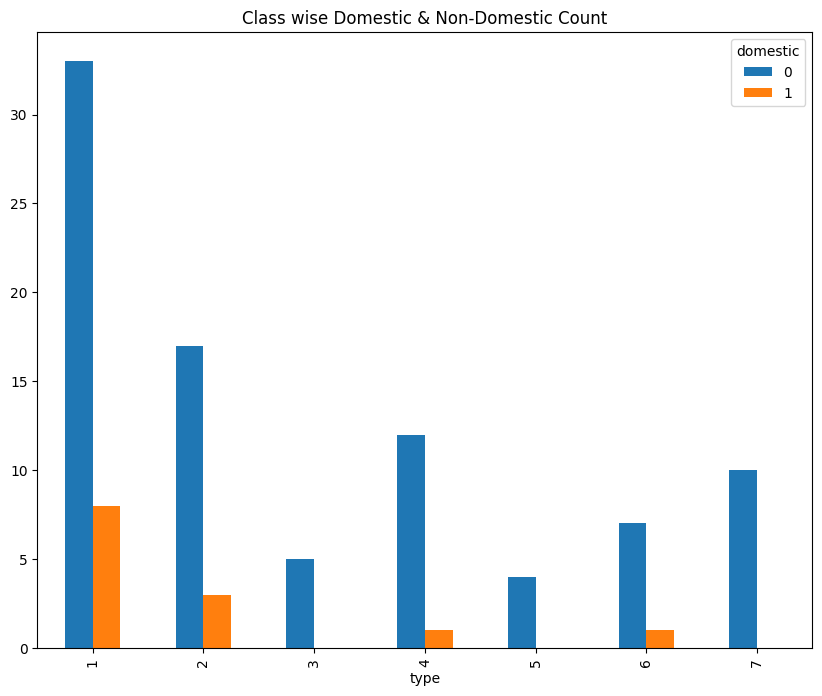

In [23]:
# Lets see species wise domestic and non-domestic animals
pd.crosstab(data['type'], data['domestic']).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

In [24]:
# Lets see how many animals provides us milk
data['milk'].value_counts()

0    60
1    41
Name: milk, dtype: int64

### So there are 41 animals in the list which provides us milk. Lets see to which category they belongs:

In [25]:
pd.crosstab(data['type'], data['milk'])

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


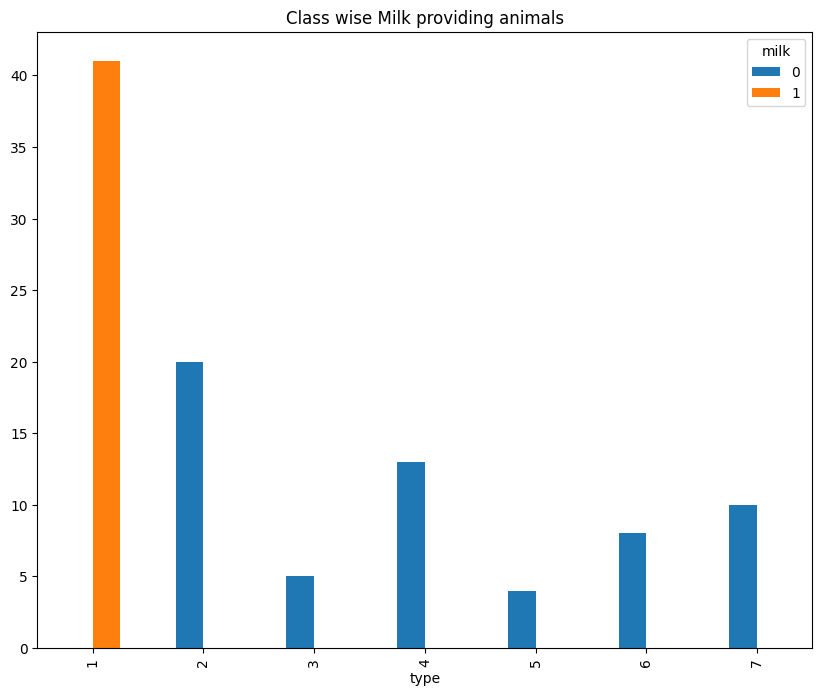

In [26]:
pd.crosstab(data['type'], data['milk']).plot(kind="bar", figsize=(10, 8), title="Class wise Milk providing animals");
plt.plot();

In [27]:
# Lets see how many animals live under water. i.e aquatic
# lets find out all the aquatic animals.
data.aquatic.value_counts() # only 36 aquatic animals are there.
# lets see there class.

0    65
1    36
Name: aquatic, dtype: int64

In [28]:
data[data['aquatic']==1].type.value_counts()

4    13
7     6
1     6
2     6
5     4
3     1
Name: type, dtype: int64

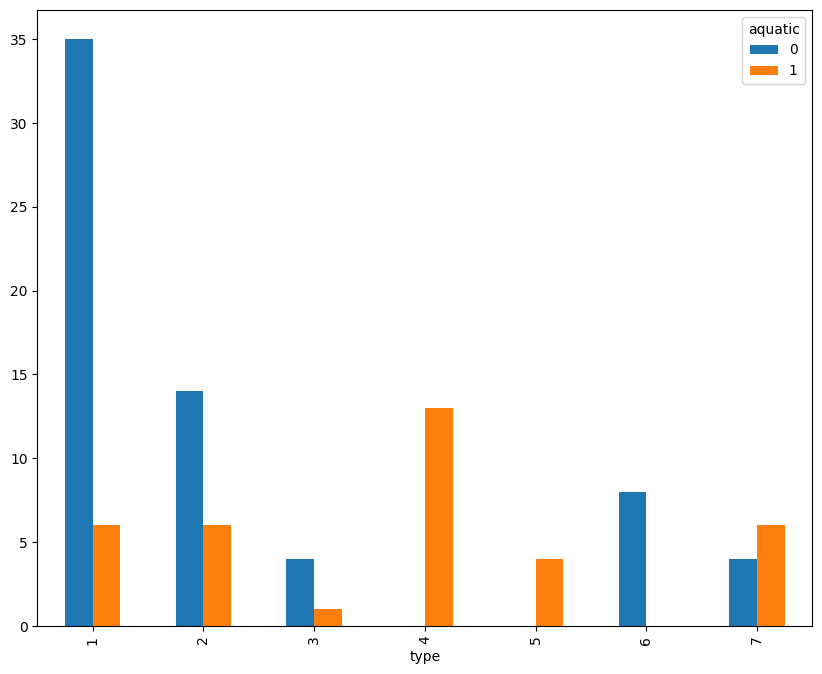

In [29]:
pd.crosstab(data['type'], data['aquatic']).plot(kind="bar", figsize=(10, 8));

In [30]:
# finding Unique value of class_type
type_list = [i for i in data.type]
unique_type = list(set(type_list))
unique_type

[1, 2, 3, 4, 5, 6, 7]

In [31]:
# split train test data into 70/30.
from sklearn.model_selection import train_test_split
X = data.iloc[:,1:16]
Y = data.iloc[:,16]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7, stratify=Y)

In [32]:
X_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
63,1,0,1,1,0,1,1,0,1,1,0,0,4,1,0
81,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0
54,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
45,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0


In [33]:
X_test.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
26,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
90,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0
46,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0
53,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0


In [34]:
Y_train.head()

63    1
81    0
86    1
54    0
45    1
Name: catsize, dtype: int64

In [35]:
Y_test.head()

26    0
4     1
90    1
46    0
53    1
Name: catsize, dtype: int64

In [36]:
num_folds = 10
kfold = KFold(n_splits=num_folds)

In [37]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=15)

In [38]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    12
0     9
dtype: int64

In [39]:
pd.crosstab(Y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
catsize,,
0,7,5
1,2,7


In [40]:
# Accuracy
np.mean(preds==Y_test)

0.6666666666666666

In [41]:
model.score(X_train,Y_train)

0.7375

In [42]:
print("Accuracy", accuracy_score(Y_test,preds)*100)

Accuracy 66.66666666666666


In [43]:
#use cross validation score since this is a small size dataset
#Get cross validation score of K-Nearest Neighbors

In [44]:
results = cross_val_score(model, X, Y, cv=kfold)

In [45]:
print(results.mean()*100)

73.09090909090908


In [46]:
print(results.std()*100)

16.85720288945347


# Grid Search for Algorithm Tuning

In [47]:
n_neighbors = np.array(range(1,20))
param_grid = dict(n_neighbors=n_neighbors)

In [48]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [49]:
print(grid.best_score_)

0.800952380952381


In [50]:
print(grid.best_params_)

{'n_neighbors': 7}


# Visualizing the CV results

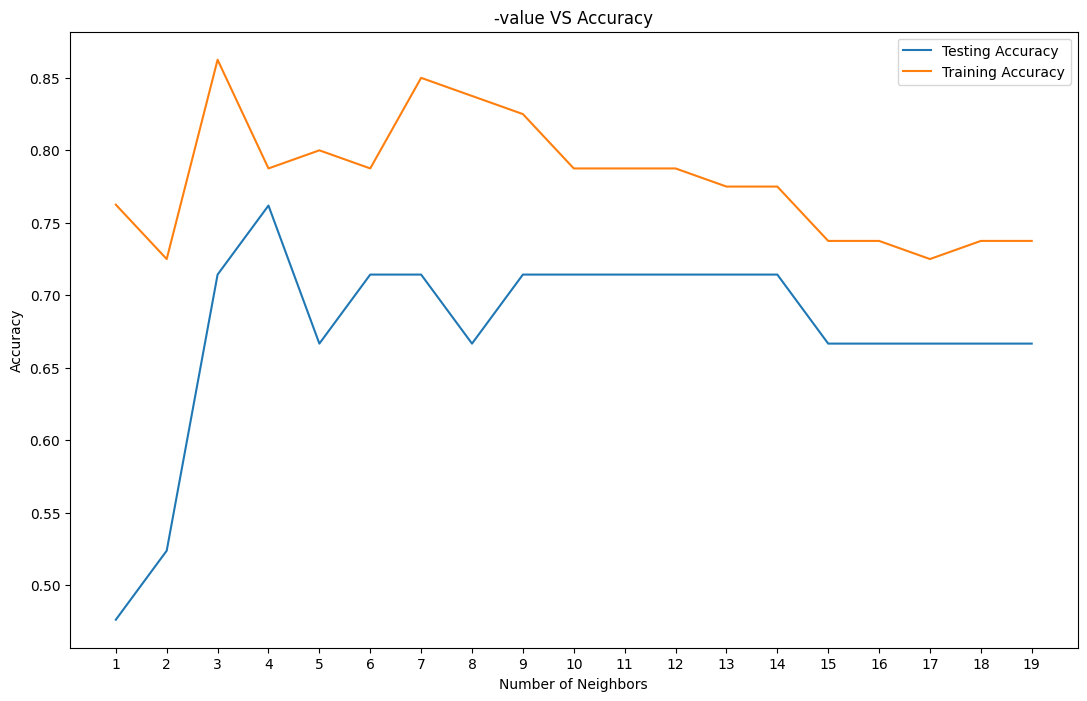

Best accuracy is 0.7619047619047619 with K = 4


In [56]:
k_values = np.arange(1,20)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,Y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train,Y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test,Y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))